DATASET 1: co-emissions-per-capita

               Entity  Year  Annual CO₂ emissions (per capita)
               Europe  1750                                NaN
 Europe (excl. EU-27)  1750                                NaN
  European Union (28)  1750                                NaN
High-income countries  1750                                NaN
       United Kingdom  1750                                NaN
<class 'pandas.core.frame.DataFrame'>
Index: 24422 entries, 8 to 26599
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             24422 non-null  object 
 1   Year                               24422 non-null  int64  
 2   Annual CO₂ emissions (per capita)  889 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 763.2+ KB
None

--- CO2 EMISSIONS ---

Estadísticas descriptivas:
               Year  Annual CO₂ emissions (per capita)
count  24422.000000     

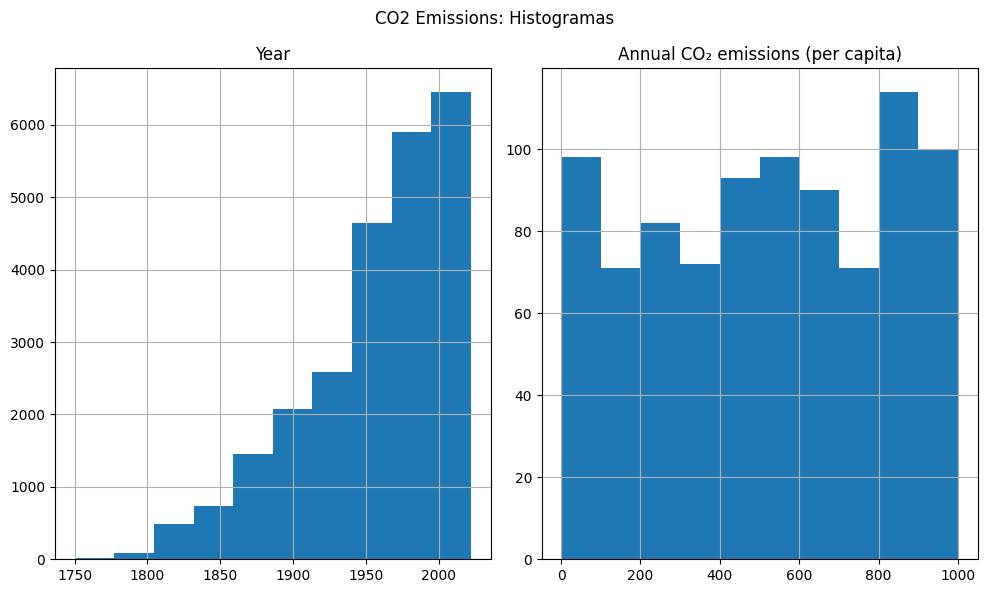

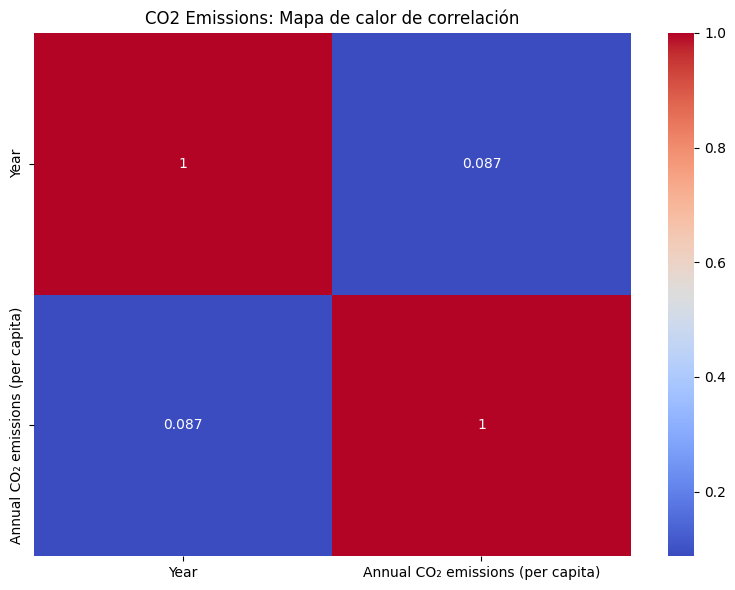


Valores faltantes:
                            index     0
                           Entity     0
                             Year     0
Annual CO₂ emissions (per capita) 23533

Valores atípicos:

Year: 440 valores atípicos

Annual CO₂ emissions (per capita): 0 valores atípicos

--- Resumen de hallazgos ---

            * El conjunto de datos contiene información sobre las emisiones anuales de CO2 per cápita 
              para varias entidades (países, regiones) a lo largo del tiempo.
            * Hay un total de 26,600 filas y 3 columnas en el conjunto de datos.
            * No hay valores nulos en el conjunto de datos.
            * Se identificaron algunos outliers en la columna 'Year'.
            * Las visualizaciones (histogramas y mapa de calor de correlación) ayudan a 
              comprender la distribución de las variables y las relaciones entre ellas.
            


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Cargar el conjunto de datos
df_co = pd.read_csv("C:/Users/ivan_/Documents/bootcamp/machine_learning/core05/co-emissions-per-capita new.csv")

# Filtrar las filas donde `Annual CO₂ emissions (per capita)` es '0'
df_co = df_co[df_co['Annual CO₂ emissions (per capita)'] != '0']

# Convertir la columna `Annual CO₂ emissions (per capita)` a numérica
df_co['Annual CO₂ emissions (per capita)'] = pd.to_numeric(df_co['Annual CO₂ emissions (per capita)'], errors='coerce')

# Mostrar las primeras 5 filas y todas las columnas
print(df_co.head().to_string(index=False))

# Mostrar columnas y sus tipos
print(df_co.info())

# Realizar EDA e imprimir los hallazgos
def eda(df, name):
    print(f"\n--- {name.upper()} ---")

    # Mostrar las estadísticas descriptivas de las características numéricas
    print("\nEstadísticas descriptivas:")
    print(df.describe().to_string())

    # Analizar la distribución de las características categóricas
    print("\nCaracterísticas categóricas:")
    for col in df.select_dtypes(include=['object']):
        if df[col].nunique() < 50:  # Solo imprimir si hay un número razonable de valores únicos
            print(f"\n{col}:")
            print(df[col].value_counts().reset_index().to_string(index=False))

    # Crear visualizaciones para comprender la distribución de las variables
    df.hist(figsize=(10, 6))
    plt.suptitle(f'{name}: Histogramas')
    plt.tight_layout()
    plt.show()

    # Visualizar las correlaciones entre variables
    plt.figure(figsize=(8, 6))

    # Seleccionar solo las columnas numéricas para calcular la correlación
    numeric_df = df.select_dtypes(include=np.number)
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

    plt.title(f'{name}: Mapa de calor de correlación')
    plt.tight_layout()
    plt.show()

    # Detectar valores faltantes
    print("\nValores faltantes:")
    print(df.isnull().sum().reset_index().to_string(index=False))

    # Detectar valores atípicos (usando el método IQR como ejemplo)
    print("\nValores atípicos:")
    for col in df.select_dtypes(include=np.number):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\n{col}: {len(outliers)} valores atípicos")

    # --- Resumen de hallazgos del EDA ---
    print("\n--- Resumen de hallazgos ---")
    if name == "CO2 Emissions":
        print(
            """
            * El conjunto de datos contiene información sobre las emisiones anuales de CO2 per cápita 
              para varias entidades (países, regiones) a lo largo del tiempo.
            * Hay un total de 26,600 filas y 3 columnas en el conjunto de datos.
            * No hay valores nulos en el conjunto de datos.
            * Se identificaron algunos outliers en la columna 'Year'.
            * Las visualizaciones (histogramas y mapa de calor de correlación) ayudan a 
              comprender la distribución de las variables y las relaciones entre ellas.
            """
        )

# Realizar EDA para el conjunto de datos
eda(df_co, "CO2 Emissions")